# Dielectric Sphere in External Uniform Field

## Import packages and define constants

In [1]:
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt

epsilon_0 = 8.85e-12

## Import Mesh

In [2]:
mesh = fn.Mesh('sph.xml')
subdomains = fn.MeshFunction("size_t", mesh, 'sph_physical_region.xml')
boundaries = fn.MeshFunction('size_t', mesh, 'sph_facet_region.xml')
dx = fn.Measure('dx', domain=mesh, subdomain_data=subdomains)
V0 = fn.FunctionSpace(mesh, 'DG', 0)
V = fn.FunctionSpace(mesh, 'P', 1)

## Define relative Permittivity

In [3]:
# Alternative to UserExpression

#eps_r = fn.Function(V0)
#for n, cell_no in enumerate(subdomains.array()):
#    subdomain_no = subdomains.array()[n]
#    if subdomain_no == 1:
#        value = 5
#    else:
#        value = 1
#        
#    eps_r.vector()[n] = value

In [4]:
class permittivity(fn.UserExpression):
    def __init__(self, markers, **kwargs):
        self.markers = markers
        super().__init__(**kwargs)
        
    def eval_cell(self, values, x, cell):
        if self.markers[cell.index] == 1:
            values[0] = 5
        else:
            values[0] = 1

eps = permittivity(subdomains, degree=1)

## Set Boundary Conditions

In [5]:
voltage = 25
top = fn.DirichletBC(V, fn.Constant(voltage), boundaries, 3)
bottom = fn.DirichletBC(V, fn.Constant(-voltage), boundaries, 4)
bcs =[top, bottom]

## Solve Problem

In [6]:
u = fn.TrialFunction(V)
v = fn.TestFunction(V)
a = fn.dot(fn.grad(u), fn.grad(v)) * (eps) * fn.dx
L = fn.Constant(0) * v * fn.dx
u = fn.Function(V)
fn.solve(a == L, u, bcs)

## Plot Solution

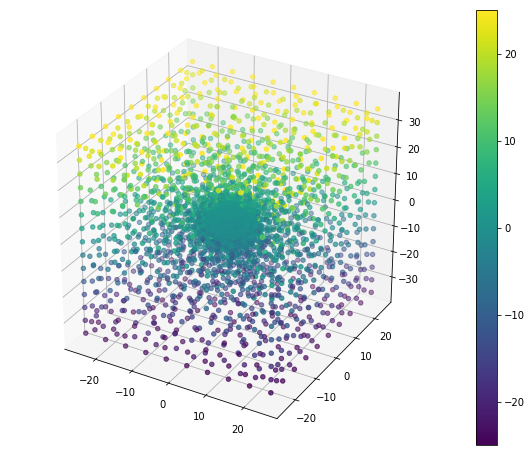

In [7]:
%matplotlib inline
plt.figure(figsize=(12,8))
# fn.plot(mesh, linewidth=0.5)
p = fn.plot(u)
plt.colorbar(p)
plt.show()

## Calculate Electric Field

In [8]:
electric_field = fn.project(-fn.grad(u))

## Compare with Analytical Solution

$E = \frac{3}{\epsilon_r + 2} E_0$

In [9]:
- 3/(5 + 2) * (50 / 70)

-0.30612244897959184

In [10]:
electric_field((0, 0, 0))[2]

-0.31408335879373694

## Output Files

In [11]:
potentialFile = fn.File('output/potential.pvd')
potentialFile << u

vtkfile = fn.File('output/e_field.pvd')
vtkfile << electric_field